# <center>Regularization in Machine Learning<center>

## What is regularization in ML


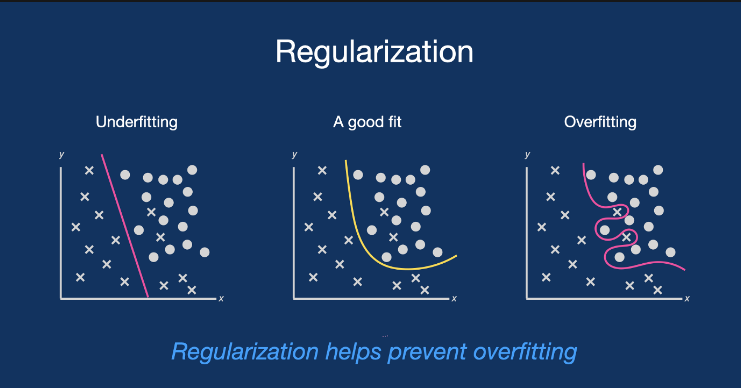


- a technique to prevent the model from overfitting by adding extra information to it.
- it maintain all variables or features in the model by reducing the magnitude of the variables. 
- Hence, it maintains accuracy as well as a generalization of the model.
- In simple words, "In regularization technique, we reduce the magnitude of the features by keeping the same number of features."
- mainly regularizes or reduces the coefficient of features toward zero.
- by adding a penalty or complexity term to the complex model

## How does Regularization Work?

Let's consider the simple linear regression equation:

# y= β0+β1x1+β2x2+β3x3+⋯+βnxn +b

Y represents the value to be predicted

X1, X2, …Xn are the features for Y.

β0,β1,…..βn are the weights or magnitude
b represents the intercept.

The loss function for the linear regression is called as RSS or Residual sum of squares.

**The coefficients are chosen, such that they minimize this loss function.**



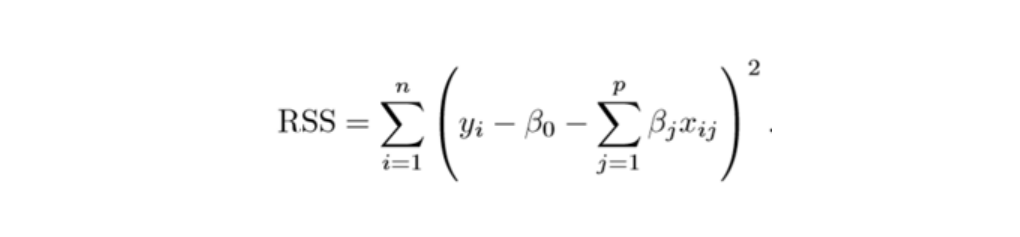





Now, this will adjust the coefficients based on your training data. If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

# Ridge regression:


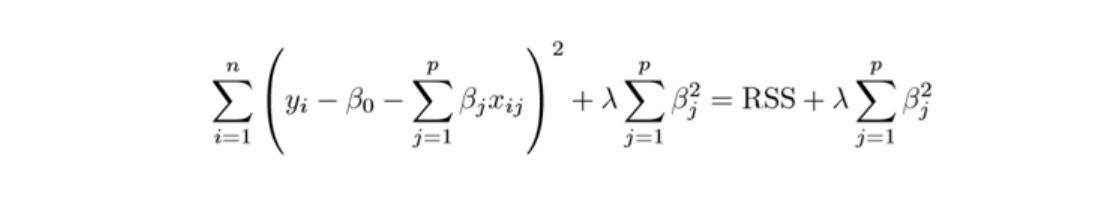

- a small amount of bias is added
- reduces the complexity of the model, 
- also called L2 regularization
- cost function is altered by adding the penalty term to it
- amount of bias added to the model is called Ridge Regression penalty..

From the cost function of Ridge Regression we can see that if the values of λ tends to zero, the equation becomes the cost function of the linear regression model..

A general linear or polynomial regression will fail if there is high collinearity between the independent variables, so to solve such problems, Ridge regression can be used.

# Lasso regression

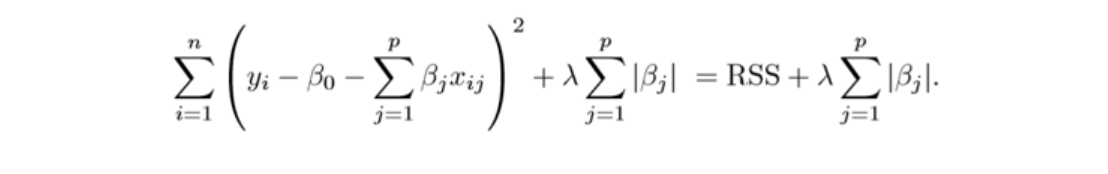

Lasso Regression:
- stands for Least Absolute Shrinkage and Selection Operator
- also called L1 regularization
- reduces the complexity of the model
- similar to the Ridge Regression except that the penalty term contains only the absolute weights instead of a square of weights
- Since it takes absolute values, hence, it can shrink the slope to zero
- whereas Ridge Regression can only shrink it near to 0.
- Some of the features are completely neglected for model evaluation
- hence Lasso helps in reducing overfitting and also feature selection

Lasso Regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function(L). 
Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function(L).

### Implementation of Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are going to use the Boston house prediction dataset, that is an inbuilt dataset in sklearn

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
# Getting attributes of boston
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [4]:
# Printing "data" attributes of the dataset, its our input 
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
# Getting features names of the dataset
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Printing first 10 values of target 
boston.target[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [7]:
# Describing dataframe from the data
df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [8]:
# Printing first 2 rows of the dataframe 'df'
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [9]:
# adding a new column 'target' from boston.target
df['target']=boston.target

In [10]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [11]:
# Printing consized summary about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- we have 13 independent variable and one dependent (House price) variable

In [12]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [15]:
print(X_train.shape,y_train.shape)

(379, 13) (379,)


In [16]:
print(X_test.shape,y_test.shape)

(127, 13) (127,)


In [17]:
# now we will start training of the model on multiple regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr_pred=lr.predict(X_test)

In [20]:
# calculation mean squared error
mse=np.mean((lr_pred-y_test)**2)
mse

22.94476204709667

In [21]:
# Putting together the coefficient and their columns

lr_coeff=pd.DataFrame()
lr_coeff['Columns']=df.columns
lr_coeff['Coefficient Values']=pd.Series(lr.coef_)

print(lr_coeff)

    Columns  Coefficient Values
0      CRIM           -0.115896
1        ZN            0.042563
2     INDUS            0.024546
3      CHAS            2.778906
4       NOX          -15.409610
5        RM            3.767513
6       AGE            0.004138
7       DIS           -1.422866
8       RAD            0.272957
9       TAX           -0.010990
10  PTRATIO           -0.989863
11        B            0.008433
12    LSTAT           -0.546287
13   target                 NaN


- We can see that most of the columns do not significant coefficients and hence they do not contribute much in model performance,
- we need to regularize the model

In [22]:
# Regularizing using ridge regression
from sklearn.linear_model import Ridge

In [24]:
ridge_reg=Ridge(alpha=1)
# here alpha parameter indicates Regularization strength; it must be a positive floating number

In [25]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1)

In [26]:
y_pred=ridge_reg.predict(X_test)

In [27]:
mse=np.mean((y_pred-y_test)**2)
mse

23.67586157463462

In [28]:
ridge_coeff=pd.DataFrame()
ridge_coeff['columns']=df.columns
ridge_coeff['Coefficient estimates']=pd.Series(ridge_reg.coef_)
print(ridge_coeff)

    columns  Coefficient estimates
0      CRIM              -0.111672
1        ZN               0.042340
2     INDUS              -0.009618
3      CHAS               2.750735
4       NOX              -8.029466
5        RM               3.810671
6       AGE              -0.001541
7       DIS              -1.306857
8       RAD               0.249981
9       TAX              -0.011088
10  PTRATIO              -0.921205
11        B               0.008554
12    LSTAT              -0.558272
13   target                    NaN


- As we can observe from the above data that alpha helps in regularizing the coefficient and make them converge faster. 
- it shows some of the coefficients become near to zero. In Ridge Regularization, the coefficients can never be 0.

### Implementation of lasso regression using sklearn

- we add Mean Absolute value of coefficients in place of mean square value
- Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0.

In [29]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1)

In [30]:
lasso.fit(X_train,y_train)
y_pred1=lasso.predict(X_test)

In [31]:
lasso_mse=np.mean((y_pred1-y_test)**2)

In [32]:
print(lasso_mse)

29.031062993345042


In [33]:
lasso_coef=pd.DataFrame()
lasso_coef['columns']=df.columns
lasso_coef['coeffienct values']=pd.Series(lasso.coef_)

In [34]:
lasso_coef

,columns,coeffienct values
0,CRIM,-0.055779
1,ZN,0.030533
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.973004
6,AGE,0.027351
7,DIS,-0.590250
8,RAD,0.200111
9,TAX,-0.012012


In [34]:
type(lasso_coef)

pandas.core.frame.DataFrame

### Python implementation of Elastic Net 

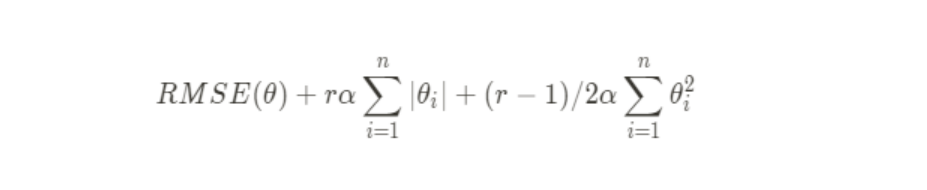

**Here, we apply both L1 and L2 regularization terms to the cost function of linear regression at the same time.**

In [35]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=1)

In [36]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=1)

In [37]:
y_pred2=elastic.predict(X_test)

In [38]:
elastic_mse=np.mean((y_pred2-y_test)**2)
# Here for reminding, mean squared error is the mean of sqaure of diffrence in y_predicted and y_test

print(elastic_mse)

28.39130417909151


In [39]:
# making dataframe of column wise coefficient of elasticnet

elastic_coeff=pd.DataFrame()
elastic_coeff['columns']=df.columns
elastic_coeff['coeff values']=pd.Series(elastic.coef_)

print(elastic_coeff)

    columns  coeff values
0      CRIM     -0.078187
1        ZN      0.037866
2     INDUS     -0.013244
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.947150
6       AGE      0.026676
7       DIS     -0.722094
8       RAD      0.240665
9       TAX     -0.013448
10  PTRATIO     -0.864747
11        B      0.006580
12    LSTAT     -0.773001
13   target           NaN


In [40]:
type(elastic_coeff)

pandas.core.frame.DataFrame

- Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. 
- It performs better than Ridge and Lasso Regression for most of the test cases

# Summary:

There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients:
- Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).
- Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).
- Elastic Net, a convex combination of Ridge and Lasso.